<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

device

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Object Detection
2. Panoptic Segmentation
3. Image Classification

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting in machine learning occurs when a model learns the training data too well, including it's noise and random fluctuations, rather than the underlying patterns. This results in a model that performs exceptionally well on the training data - often achieving very high accuracy - but fails to generalize to new unseen data leading to poor performance on validation or test datasets.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Ways to prevent overfitting in machine learning : 

1. Increasing the size of thr training datasets is one of the most effective methods, as more data reduces the model's tendency to memorise patterns and improve generalization. When acquiring more data is not feasible data augmentation can artificially expand the dataset by applying transformations such as rotation, flipping or scaling, particularly useful in image classification tasks.

2. Using cross-validation such as K-fold cross-validation, ensures that the model is evaluated on multiple subsets of data, providing a more robust estimate of its performance and helping to detect overfitting. Monitoring validation performance during training and implementing early stopping - halting training when validation performance begins to degrade - can prevent the model from learning noise in the training data.

3. Regularization techniques like L1(lasso) and L2 (ridge) regularization adds penalty terms to the model's cost function, discouraging overly complex models by shrinking or eliminating the influence of less important features.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Important Points : 

1. **Padding** : There exist many padding techniques, but the most commonly used approach is zero-padding because of its performance, simplicity, and computational efficiency. The technique involves adding zeros symmetrically around the edges of an input. This approach is adopted by many high-performing CNNs such as AlexNet.

2. **Kernel Size** : Small kernel sizes are able to extract a much larger amount of information containing highly local features from the input. A smaller kernel size also leads to a smaller reduction in layer dimensions, which allows for a deeper architecture. A large kernel size extracts less information, which leads to a faster reduction in layer dimensions, often leading to worse performance. Large kernels are better suited to extract features that are larger.

3. **Stride** : Stride indicates how many pixels the kernel should be shifted over at a time. The impact stride has on a CNN is similar to kernel size. As stride is decreased, more features are learned because more data is extracted, which also leads to larger output layers. On the contrary, as stride is increased, this leads to more limited feature extraction and smaller output layer dimensions.

**ReLU** : Neural networks are extremely prevalent in modern technology—because they are so accurate! The highest performing CNNs today consist of an absurd amount of layers, which are able to learn more and more features. Part of the reason these groundbreaking CNNs are able to achieve such tremendous accuracies is because of their non-linearity. The ReLU activation function is specifically used as a non-linear activation function, as opposed to other non-linear functions such as Sigmoid because it has been empirically observed that CNNs using ReLU are faster to train than their counterparts.

**Softmax** : A softmax operation serves a key purpose: making sure the CNN outputs sum to 1. Because of this, softmax operations are useful to scale model outputs into probabilities.
You might be thinking what the difference between standard normalization and softmax is—after all, both rescale the logits between 0 and 1. Remember that backpropagation is a key aspect of training neural networks—we want the correct answer to have the largest “signal.” By using softmax, we are effectively “approximating” argmax while gaining differentiability. Rescaling doesn’t weigh the max significantly higher than other logits, whereas softmax does. Simply put, softmax is a “softer” argmax—see what we did there?

**Pooling layers** : There are many types of pooling layers in different CNN architectures, but they all have the purpose of gradually decreasing the spatial extent of the network, which reduces the parameters and overall computation of the network. The type of pooling used in the Tiny VGG architecture above is Max-Pooling. In the Tiny VGG architecture above, the pooling layers use a 2x2 kernel and a stride of 2. This operation with these specifications results in the discarding of 75% of activations. By discarding so many values, Tiny VGG is more computationally efficient and avoids overfitting.

**Flatten Layer** : This layer converts a three-dimensional layer in the network into a one-dimensional vector to fit the input of a fully-connected layer for classification. For example, a 5x5x2 tensor would be converted into a vector of size 50. The previous convolutional layers of the network extracted the features from the input image, but now it is time to classify the features. We use the softmax function to classify these features, which requires a 1-dimensional input. This is why the flatten layer is necessary. This layer can be viewed by clicking any output class.



## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

train_data = datasets.MNIST(root='data',
                            train=True,
                            download = True,
                            transform = ToTensor(),
                            target_transform = None)

test_data = datasets.MNIST(root='data',
                           train = False,
                           download = True,
                           transform = ToTensor())


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
print(train_data)
image, label = train_data[0]
print(train_data[0],"\n")
print(train_data.classes)

print(f"\n{image.shape}")

class_names = train_data.classes

In [ ]:
# Visualizing our data
torch.manual_seed(42)
fig = plt.figure(figsize = (10,10))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)   # shuffle data on every epoch

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader}, {test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# check what's insize the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"{train_features_batch.shape}, \n{train_labels_batch.shape}")


# Visualize the dataloader
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('Off')
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
# create a convolutional neural network
# recreating the model_2 i.e. TinyVGG to fit the MNIST data
class MNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units = 10): 
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)   # default stride value is same as kernel size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),     # default stride is 1
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 7 * 7, 
                      out_features = output_shape)
        )
        
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
    
torch.manual_seed(42)
model_1 = MNISTModelV1(input_shape = 1, 
                       hidden_units = 10,
                       output_shape = len(class_names)).to(device)
model_1

In [ ]:
x = torch.randn((1,1,28,28)) * 255
r = model_1(x.to(device))
r

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
# Define the accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct/len(y_pred) * 100
    return acc


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0,0
    model.to(device)
    model.train()
    
    for batch, (X,y) in enumerate(data_loader):
        # Send the data to GPU/CPU using device
        X,y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)
        
        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))
            
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.01)

In [ ]:
from timeit import default_timer as timer
from tqdm import tqdm
epochs = 5

train_time_start_on_gpu = timer()
for epoch in range(epochs):
    print(f"Epoch: {epoch}/{epochs}")
    train_step(model = model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model = model_1,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)
train_time_end_on_gpu = timer()
total_train_time_on_gpu = train_time_end_on_gpu - train_time_start_on_gpu
print(f"GPU training time: {total_train_time_on_gpu:.4f}")

In [ ]:
from timeit import default_timer as timer

epochs = 5
device = 'cpu' 
train_time_start_on_cpu = timer()

for epoch in range(epochs):
    print(f"Epoch: {epoch}/{epochs}")
    train_step(model = model_1,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model = model_1,
              data_loader = test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn = accuracy_fn,
              device = device)
train_time_end_on_cpu = timer()
total_train_time_on_cpu = train_time_end_on_cpu - train_time_start_on_cpu
print(f"GPU training time: {total_train_time_on_cpu:.4f}")

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, 
                     device: torch.device):
    pred_probs = []
    model.eval()
    
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim=0).to(device)   # add an extra dimension and send the samlple to device
            # forward pass
            pred_logit = model(sample)
            
            # Get the prediction probability (logits -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)  # note: perform softmax on the logits dimension, not batch dimension (in this case we have a batch size of 1, so can on dim=0)
            
            # get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [ ]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

In [ ]:
pred_probs = make_predictions(model = model_1, data = test_samples, device=device)
# view first two prediction probabilities list
print(pred_probs[:2])

# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)

# Are our predictions in the same form as our test labels
print(test_labels, pred_classes)

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # create a subplot
    plt.subplot(nrows, ncols, i+1)
    
    # PLot the target image
    plt.imshow(sample.squeeze(), cmap='gray')
    
    # Find the prediction label (in text form, eg: T-Shirt)
    pred_label = class_names[pred_classes[i]]
    
    
    truth_label = class_names[test_labels[i]]
    
    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    
    # Check for equality and change title color accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# IMport tqdm for progress bar
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_1.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        X,y = X.to(device), y.to(device)
        
        # forward_pass
        y_logit = model_1(X)
        
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())
        
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

In [ ]:
# Plotting the confusion matrix
import mlxtend

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                        target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random_tensor = torch.randn((1,3,64,64))

hidden_units = 20
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = hidden_units,
                       kernel_size = 2,
                       stride = 1,
                       padding = 1)

conv_layer(random_tensor).shape

- If the kernel_size goes up, the resulting tensor shape is reduced.

- if the kernel_size goes down, the resulting tensor shape in increased provided the same stride and padding value

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was `wrong` alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

Pytorch Image Models: https://github.com/huggingface/pytorch-image-models

Torchvision models: https://docs.pytorch.org/vision/stable/models.html#semantic-segmentation

In [2]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Check pytorch version
print(f"Pytorch version: {torch.__version__} \ntorchvision version: {torchvision.__version__}")

Pytorch version: 2.8.0 
torchvision version: 0.23.0


In [3]:
# Setup training data
# Load the model
train_data = datasets.FashionMNIST(root='data',
                                   train = True,
                                   download = True,
                                   transform = ToTensor(),
                                   target_transform = None)

test_data = datasets.FashionMNIST(root='data',
                                  train = False,
                                  download = True,
                                  transform = ToTensor(),
                                  target_transform = None)

train_data
class_names = train_data.classes

torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

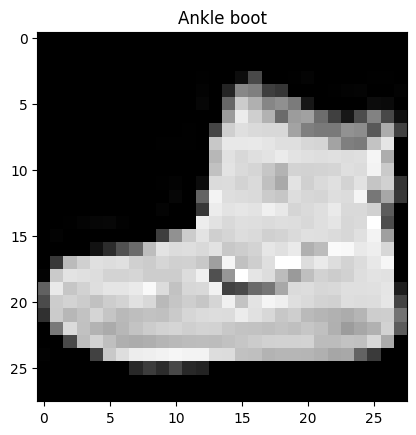

In [4]:
# See the first training sample
image, label = train_data[0]
print(image.shape)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

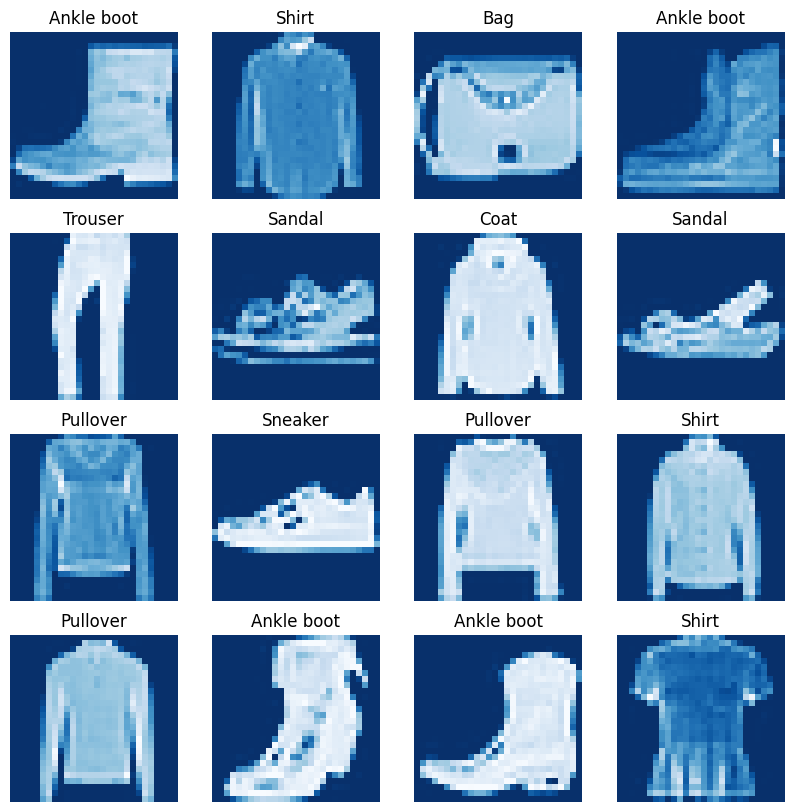

In [5]:
# visualize your data
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))

rows, cols = 4,4
for i in range(1,rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='Blues_r')
    plt.title(class_names[label])
    plt.axis('off')


(-0.5, 27.5, 27.5, -0.5)

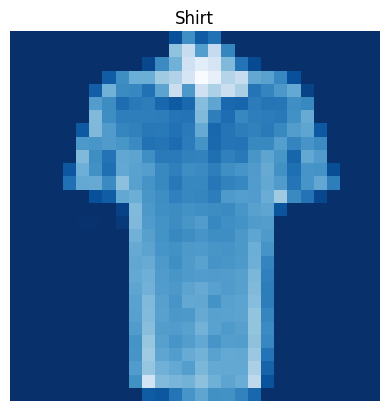

In [6]:
# Prepare the dataloader
from torch.utils.data import DataLoader

# Setup the batch size hyperparameters
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,   # dataset to turn into iterable
                              batch_size = BATCH_SIZE,
                              shuffle = True)


test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)   # don't necessarily have to shuffle the testing data


# Let's check out what we have created
# print(train_dataloader, test_dataloader)

# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
# print(train_features_batch.shape, train_labels_batch.shape)

# Show a random sample from the train_dataloader
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
plt.imshow(train_features_batch[random_idx].squeeze(), cmap='Blues_r')
plt.title(class_names[train_labels_batch[random_idx].item()])
plt.axis('Off')

In [7]:
# Build the model
class FashionMNISTModelv1(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units=10):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)     # stride defaults to kernel size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, 1,1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7, 
                      out_features = output_shape)
        )
        
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x
    
model_2 = FashionMNISTModelv1(1,len(class_names), hidden_units=10)
model_2


FashionMNISTModelv1(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [8]:
# Make predictions and get the Model's results
images = torch.randn((32,1,28,28))*255
test_image = images[0]
model_2(images).shape
        

torch.Size([32, 10])

In [9]:
# Setup device agnostic code
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
device

'mps'

In [10]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [11]:
# Define the accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct/len(y_pred) * 100
    return acc


In [12]:
# define the evaluation function
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    # Evaluates a given models on a given dataset
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred = y_pred.argmax(dim=1))
            
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {
        'model name': model.__class__.__name__,
        'model_loss' : loss.item(),
        'model_acc' : acc
    }

model_2.to(device)
# calculate model 1 results with device agnostic code
model_2_results = eval_model(model = model_2, data_loader = test_dataloader,
                             loss_fn = loss_fn, accuracy_fn = accuracy_fn,
                             device = device)

model_2_results
            


{'model name': 'FashionMNISTModelv1',
 'model_loss': 2.303466796875,
 'model_acc': 10.133785942492013}

In [13]:
# define the training and testing method
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device
               ):
    train_loss, train_acc = 0,0
    
    for batch, (X,y) in enumerate(data_loader):
        X,y = X.to(device), y.to(device)
        # 1. forward pass
        y_logits = model(X)

        # 2. calculate the loss
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc = accuracy_fn(y_true=y, y_pred = y_logits.argmax(dim=1))
        
        # OPtimizer zero grad
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Calculate the loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_loss /= len(data_loader)
    print(f"Train loss: {train_loss:.5f}, Train acc: {train_acc:.2f}%")
    
def test_step(model, data_loader, loss_fn, accuracy_fn, device):
    model.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred = test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

In [16]:
# define the training loop
from tqdm import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

# train time start on gpu
tts_gpu = timer()

epochs = 3
for epoch in range(epochs):
    print(f'Epoch: {epoch+1}/{epochs}')
    
    train_step(model = model_2, 
               data_loader = train_dataloader, 
               loss_fn = loss_fn, 
               optimizer = optimizer, 
               accuracy_fn=accuracy_fn, 
               device=device)
    test_step(model = model_2, 
              data_loader = test_dataloader, 
              loss_fn = loss_fn, 
              accuracy_fn = accuracy_fn, 
              device = device)

# Train time end on gpu
tte_gpu = timer()

print(f"Total Train time on GPU: {tte_gpu - tts_gpu}")
    

Epoch: 1/3
Train loss: 0.00019, Train acc: 93.75%
Test Loss: 0.36176, Test Acc: 87.39%
Epoch: 2/3
Train loss: 0.00018, Train acc: 81.25%
Test Loss: 0.36420, Test Acc: 87.30%
Epoch: 3/3
Train loss: 0.00018, Train acc: 90.62%
Test Loss: 0.35461, Test Acc: 87.28%
Total Train time on GPU: 13.391742625040933


In [17]:
# make predictions
test_preds = []
model_2.eval()

with torch.inference_mode():
    for X_test, y_test in test_dataloader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        test_logits = model_2(X_test)
        test_pred_probs = torch.softmax(test_logits, dim=1)
        test_pred_labels = torch.argmax(test_pred_probs, dim=1)
        test_preds.append(test_pred_labels)
    
test_preds = torch.cat(test_preds).cpu()
test_preds[:10], len(test_preds)


(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [18]:
# Take the wrong prediction

# Get the wrong prediction indexes
import numpy as np

wrong_pred_indexes = np.where(test_preds != test_data.targets)[0]
len(wrong_pred_indexes)

1273

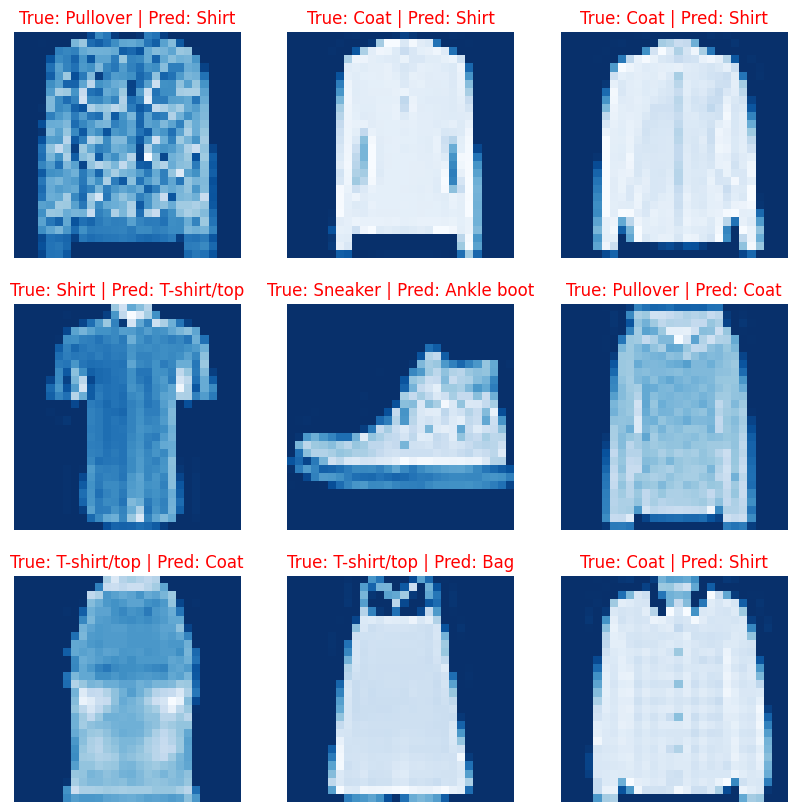

In [19]:
# Visualize the wrong predictions

# Select a random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10,10))
for i, idx in enumerate(random_selection):
    # Get true and pred labels
    true_label = class_names[test_data[idx][1]]
    pred_label = class_names[test_preds[idx]]
    
    # plot the wrong prediction with its original label
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[idx][0].squeeze(), cmap='Blues_r')
    plt.title(f"True: {true_label} | Pred: {pred_label}", c='r')
    plt.axis('off')